In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Homework 2.1.1 - 1D Wave

Solve the wave equation

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} = c^2 \frac{{{\partial ^2}u}}{{\partial {x^2}}}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)** and **the frequency ($\omega$)** to make a nice time-animated graph video clip.

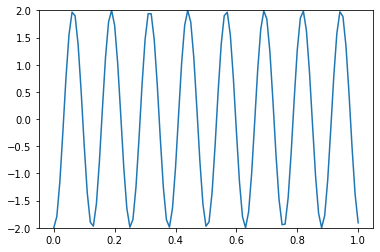

In [2]:
# Set up an array of ux0
N = 100
L = 1
x = np.linspace(0, L, num=N + 1, endpoint=True)
Ux0 = 0*x # u(x, 0) = 0

Uold = Ux0
# Set up initial condition for the time derivative at t = 0
dUx0 = np.zeros(N + 1)

dt = 0.01 # Set up time step size
dh = L / N # Spatial step size
c = 1
eps = ((dt*c/dh)**2)

# Calculate time step j = 1
Uxj = np.zeros(N + 1)
for i in np.linspace(1, N-1, N-1, dtype=int):
    Uxj[i] = 0.5*eps*(Ux0[i+1] + Ux0[i-1]) + (1. - eps)*(Ux0[i]) + dt * dUx0[i]

UAll = np.array([Uxj])
fig1 = plt.figure()
l = plt.plot(x, Uxj)
axes = plt.gca()
axes.set_ylim([-2, 2]) # 2*sin(x)

omega = 0.5
for j in range(200): # j = t
    Unew = np.zeros(N+1)
    Unew[0] = 2*np.sin(omega*j) # u(0, t) = 2*sin(omega*t)
    Unew[-1] = Uxj[-1] - c*(Uxj[-1] - Uxj[-2]) # Open boundary condition
    for i in np.linspace(1, N-1, N-1, dtype=int): # i = x
        Unew[i] = eps*(Uxj[i+1] + Uxj[i-1]) + 2.*(1. - eps)*Uxj[i] - Uold[i]
    Uold = Uxj
    Uxj = Unew
    UAll = np.vstack([UAll, Unew])

def update_line(num, line):
    line.set_data(x, UAll[num])
    return line,
        
line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(l), interval=20, blit=True)
writergif = animation.PillowWriter(fps=30)
line_ani.save('1D-Wave.gif', writer=writergif)
plt.show()

___
### Homework 2.1.2 - 1D Wave with damping

Solve the wave equation

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} - k \frac{\partial u}{\partial t}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)**, **the frequency ($\omega$)**, and **the damping factor ($k$)** to make a nice time-animated graph video clip.

$$
    \frac{\partial f(x)}{\partial x} = \frac{f(x+h)-f(x-h)}{2h}
$$
$$
    \frac{\partial u}{\partial t} \approx \frac{u_{i,j+1} - u_{i,j-1}}{2 \delta}
$$

$$
    \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\delta ^2} = c^{2} \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} - k \frac{u_{i,j+1} - u_{i,j-1}}{2 \delta}
$$
$$
    \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\delta ^2} + k \frac{u_{i,j+1} - u_{i,j-1}}{2 \delta} = c^{2} \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}
$$
$$
    \frac{ 2( u_{i,j+1} - 2u_{i,j} + u_{i,j-1} ) + k \delta (u_{i,j+1} - u_{i,j-1} ) }{2 \delta ^2} = c^{2} \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}
$$
$$
    2( u_{i,j+1} - 2u_{i,j} + u_{i,j-1} ) + k \delta (u_{i,j+1} - u_{i,j-1}) = 2 \frac{\delta^{2} c^{2}}{h^{2}} (u_{i+1,j} - 2u_{i,j} + u_{i-1,j})
$$
$$
    2u_{i,j+1} - 4u_{i,j} + 2u_{i,j-1} + k \delta u_{i,j+1} - k \delta u_{i,j-1} = 2 \frac{\delta^{2} c^{2}}{h^{2}} (u_{i+1,j} - 2u_{i,j} + u_{i-1,j})
$$
$$
    2u_{i,j+1} + k \delta u_{i,j+1} = 2 \frac{\delta^{2} c^{2}}{h^{2}} (u_{i+1,j} - 2u_{i,j} + u_{i-1,j}) + 4u_{i,j} - 2u_{i,j-1} + k \delta u_{i,j-1}
$$
$$
    (2 + k \delta) u_{i,j+1} = 2 \frac{\delta^{2} c^{2}}{h^{2}} (u_{i+1,j} - 2u_{i,j} + u_{i-1,j}) + 4u_{i,j} + (-2 + k \delta) u_{i,j-1}
$$
$$
    u_{i,j+1} = \frac{2 \frac{\delta^{2} c^{2}}{h^{2}} (u_{i+1,j} - 2u_{i,j} + u_{i-1,j}) + 4u_{i,j} + (-2 + k \delta) u_{i,j-1}}{2 + k \delta}
$$

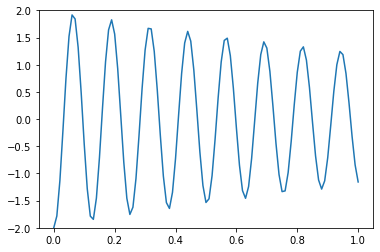

In [3]:
# Set up an array of ux0
N = 100
L = 1
x = np.linspace(0, L, num=N + 1, endpoint=True)
Ux0 = 0*x # u(x, 0) = 0

Uold = Ux0
# Set up initial condition for the time derivative at t = 0
dUx0 = np.zeros(N + 1)

dt = 0.01 # Set up time step size
dh = L / N # Spatial step size
c = 1
eps = ((dt*c/dh)**2) # dt = delta, dh = h

# Calculate time step j = 1
Uxj = np.zeros(N + 1)
for i in np.linspace(1, N-1, N-1, dtype=int):
    Uxj[i] = 0.5*eps*(Ux0[i+1] + Ux0[i-1]) + (1. - eps)*(Ux0[i]) + dt * dUx0[i]

UAll = np.array([Uxj])
fig1 = plt.figure()
l = plt.plot(x, Uxj)
axes = plt.gca()
axes.set_ylim([-2, 2]) # 2*sin(x)

omega = 0.5
k = 1
for j in range(200): # j = t
    Unew = np.zeros(N+1)
    Unew[0] = 2*np.sin(omega*j) # u(0, t) = 2*sin(omega*t)
    Unew[-1] = Uxj[-1] - c*(Uxj[-1] - Uxj[-2]) # Open boundary condition
    for i in np.linspace(1, N-1, N-1, dtype=int): # i = x
        Unew[i] = (2*eps*(Uxj[i+1]-2*Uxj[i]+Uxj[i-1]) + 4*Uxj[i] + (-2+k*dt)*Uold[i]) / (2+k*dt)
    Uold = Uxj
    Uxj = Unew
    UAll = np.vstack([UAll, Unew])

def update_line(num, line):
    line.set_data(x, UAll[num])
    return line,
        
line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(l), interval=20, blit=True)
writergif = animation.PillowWriter(fps=30)
line_ani.save('1D-Wave-with-damping.gif', writer=writergif)
plt.show()